# Проект: Исследование сервиса аренды самокатов.
<a id="0"></a>
1. [Описание проекта](#1)  
2. [Первичный анализ данных](#2) <br>
2.1. [Пользователи](#2_1)<br>
2.2. [Поездки](#2_2)<br>
2.3. [Подписки](#2_3)<br>
   [Вывод](#2_4)<br>
3. [Предобработка данных](#3) <br>
3.1. [Обработка пропусков](#3_0)<br>
3.2. [Изменение типов данных](#3_1)<br>
3.3. [Обработка дубликатов](#3_2)<br>
3.4. [Обработка аномальных значений](#3_3)<br>
     [Вывод](#3_4)
4. [Исследовательский анализ данных](#4)<br>
4.1 [Частота встречаемости городов](#4_1)<br>
4.2 [Соотношение пользователей с подпиской и без подписки](#4_2)<br>
4.3 [Возраст пользователей](#4_3)<br>
4.4 [Расстояние, которое пользователь преодолел за одну поездку](#4_4)<br>
4.5 [Продолжительность поездок](#4_5)<br>
5. [Объединение данных](#5)<br>
     [Вывод](#5_1)
6. [Подсчёт выручки](#6)<br>
     [Вывод](#6_1)
7. [Статистический анализ данных](#7)<br>
7.1. [Гипотеза: Пользователи с подпиской тратят больше времени на поездки](#7_1)<br>
7.2. [Гипотеза: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку](#7_2)<br>
7.3. [Гипотеза: Выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки](#7_3)<br>
7.4. [Внимание вопрос](#7_4)<br>
8. [Распределения](#8)<br>
8.1. [Промокоды](#8_1)<br>
8.2. [Push-уведомления](#8_2)<br>
9. [Общий вывод](#9)

## 1. Описание проекта
<a id="1"></a>

**Цель и контекст исследования** <br>
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, для этого в исследовании необходимо ответить на следуюшие вопросы:
1. Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

**Входные данные**<br>
Данные получены от сервиса GoFast.<br>
В файле "users_go.csv" содержится информация о пользователях, их поездках и подписках.<br>
В файле "rides_go.csv" содержится информация о поездках пользователей.<br>
В файле "subscriptions_go.csv" содержится о типах подписок и их условиях.<br>

**План исследования**
1. Получение данных. Обзор и первичный анализ данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Объединение данных.
5. Подсчёт выручки
6. Статистический анализ данных.
7. Результаты исследования.

## 2. Первичный анализ данных.
<a id="2"></a>

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### 2.1. Пользователи.
<a id="2_1"></a>

In [2]:
# Загрузка данных из csv-файла в датафрейм c помощью библиотеки pandas.
try:
    data_users = pd.read_csv('users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
# Выведем первые 5 строчек датафрейма пользователи на экран.
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


**Описание данных**<br>
`user_id` — уникальный идентификатор пользователя<br>
`name` — имя пользователя<br>
`age` — возраст<br>
`city` — город<br>
`subscription_type` — тип подписки (free, ultra)

In [4]:
# Выведем основную информацию о датафрейме пользователи
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


### 2.2. Поездки.
<a id="2_2"></a>

In [10]:
# Поездки
try:
    data_rides = pd.read_csv('rides_go.csv')
except:
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [11]:
# Выведем первые 5 строчек датафрейма поездки на экран.
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


**Описание данных**<br>
`user_id` — уникальный идентификатор пользователя<br>
`distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)<br>
`duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»<br>
`date` — дата совершения поездки<br>

In [12]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


### 2.3. Подписки.
<a id="2_3"></a>

In [17]:
# Подписки
try:
    data_subscriptions = pd.read_csv('subscriptions_go.csv')
except:
    data_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [18]:
# Выведем первые 5 строчек датафрейма подписки на экран.
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Описание данных**<br>
`subscription_type` — тип подписки<br>
`minute_price` — стоимость одной минуты поездки по данной подписке<br>
`start_ride_price` — стоимость начала поездки<br>
`subscription_fee` — стоимость ежемесячного платежа<br>

In [19]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


### Вывод
<a id="2_4"></a>

<!-- **Пользователи:**
1. Пропусков нет.
2. Есть явные дубликаты.
3. Аномальных значений нет.

**Поездки:**
1. Пропусков нет.
2. Неверный тип данных в столбце `date`.
2. Дубликатов нет.
3. Аномальные значения в столбце `duration` - время поездки менее 1 минуты.

**Подписки:**
1. Пропусков нет.
2. Дубликатов нет.
3. Аномальных значений нет. -->

В датафрем `data_users` загружены данные из файла users_go.csv.<br>
В датафрем `data_rides` загружены данные из файла rides_go.csv.<br>
В датафрем `subscriptions` загружены данные из файла subscriptions_go.csv.<br>

С помощью метода `info()` получена первичная информация по данным.

## 3. Предобработка данных
<a id="3"></a>

### 3.1. Обработка пропусков.
<a id="3_0"></a>

In [20]:
# Выведем количество пропущенных значений для каждого столбца таблицы Пользователи
data_null = data_users.isna()
data_null.apply(['sum', 'mean']).transpose().style.format('{:.3f}').background_gradient(cmap='Blues', axis=0)

,sum,mean
user_id,0.000,0.000
name,0.000,0.000
age,0.000,0.000
city,0.000,0.000
subscription_type,0.000,0.000


Нет пропущенных значений.

In [21]:
# Выведем количество пропущенных значений для каждого столбца таблицы Поездки
data_null = data_rides.isna()
data_null.apply(['sum', 'mean']).transpose().style.format('{:.3f}').background_gradient(cmap='Blues', axis=0)

,sum,mean
user_id,0.000,0.000
distance,0.000,0.000
duration,0.000,0.000
date,0.000,0.000


Нет пропущенных значений.

### 3.2. Изменение типов данных.
<a id="3_1"></a>

In [22]:
# Изменим в столбце date тип данных на datetime (таблица Поездки)
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [23]:
# Плсмотрим данные за какой период имеются в таблице
print(f"Данные за период с {data_rides['date'].min().date()} по {data_rides['date'].max().date()}.")

Данные за период с 2021-01-01 по 2021-12-30.


In [24]:
# Создадим новый столбец с номером месяца на основе столбца date (таблица Поездки)
data_rides['month'] = data_rides['date'].dt.month

In [25]:
# Изменим в столбце distance тип данных на int32
data_rides['distance'] = data_rides['distance'].astype('int32')

### 3.3. Обработка дубликатов.
<a id="3_2"></a>

In [26]:
# Проверим таблицу Пользователи датасет на явные дубликаты
data_users.duplicated().sum()
# data_users[data_users.duplicated()]

31

In [27]:
# Удалим дубликаты (таблица Пользователи)
data_users.drop_duplicates(inplace=True)
data_users.duplicated().sum()

0

Дубликатов нет.

In [28]:
# # Проверим таблицу Поездки на явные дубликаты
data_rides.duplicated().sum()

0

Дубликатов нет.

In [29]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов нет.

### 3.4. Обработка аномальных значений.
<a id="3_3"></a>

In [30]:
# Посмотрим описательные статистики
print(data_users['age'].describe())

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


In [31]:
# Посмотрим на распределения значений
print(data_users['city'].value_counts())

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


In [32]:
# Посмотрим на распределения значений
print(data_users['subscription_type'].value_counts())

subscription_type
free     835
ultra    699
Name: count, dtype: int64


In [33]:
# Посмотрим описательные статистики
print(data_rides['distance'].describe())

count    18068.000000
mean      3070.159841
std       1116.831548
min          0.000000
25%       2542.750000
50%       3133.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64


В столбце `distance` встречается дистанция поездки менее 1 м, скорее всего это ошибочная аренда самоката пользователем. Доля таких поездок 0.01% от всего датасета. Оставим.

In [34]:
print('Количество поездок на расстояние менее 1 м:', data_rides[data_rides['distance'] < 1]['distance'].count())
print(f"Доля таких поездок: {data_rides[data_rides['distance'] < 1]['distance'].count() / len(data_rides['distance']):.2%}")

Количество поездок на расстояние менее 1 м: 1
Доля таких поездок: 0.01%


In [35]:
# Посмотрим описательные статистики
print(data_rides['duration'].describe())

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


В столбце `duration` встречается время поездки менее 1 минуты, скорее всего это ошибочная аренда самоката пользователем. Доля таких поездок 0.5% от всего датасета. Оставим.

In [36]:
print('Количество поездок длительностью менее 1 минуты:', data_rides[data_rides['duration'] < 1]['duration'].count())
print(f"Доля таких поездок: {data_rides[data_rides['duration'] < 1]['duration'].count() / len(data_rides['duration']):.2%}")

Количество поездок длительностью менее 1 минуты: 95
Доля таких поездок: 0.53%


### Вывод
<a id="3_4"></a>
При предобработке данных выполнены следующие действия:
1. В столбце `first_day_exposition` (таблица Поездки) изменен тип данных на datetime. В столбце `distance` (таблица Поездки) изменен тип данных на int32.
2. Создан новый столбец `month` (таблица Поездки) с номером месяца на основе столбца date (таблица Поездки).
3. Удалены дубликаты в таблице Пользователи.
4. Обращено внимание на аномально короткие поездки (менее 1 мин) в столбце `duration` и (менее 1 м) в столбце `distance`.

## 4. Исследовательский анализ данных
<a id="4"></a>

### 4.1 Частота встречаемости городов.
<a id="4_1"></a>

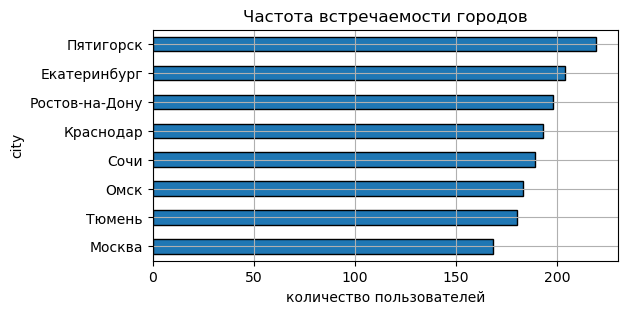

In [37]:
# Выведем диаграмму распределения пользователей по городам
data_users['city'].value_counts(ascending=True).plot(kind='barh', y='count', grid=True, ec='black', figsize=(6, 3))
plt.title('Частота встречаемости городов')
plt.xlabel('количество пользователей');
# plt.ylabel('город');

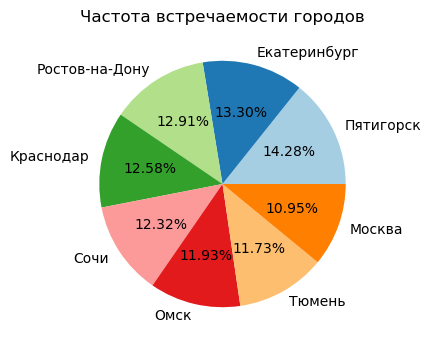

In [38]:
# Построим круговую диаграмму
data_users['city'].value_counts().plot(kind='pie', y='count', autopct='%1.2f%%', figsize=(6, 4), colors=plt.cm.Paired.colors)
plt.title('Частота встречаемости городов')
plt.ylabel('');

In [39]:
# Посмотрим на распределения значений
print(data_users['city'].value_counts())

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


**Вывод**<br>
Количество пользователей по городам распределено равномерно. Наибольшее количество в Пятигорске - 219 пользователей. Меньше всего пользователей в Москве - 168. <br>
В городах, где менее развит общественный транспорт, люди чаще выбирают самокаты, в Москве же больше альтернатив таких, как метро, такси, автобусы и т.д.
Так же может преобладать влияние погоды, в южных регионах пользователи чаще выбирают поездки на самокате.

### 4.2 Соотношение пользователей с подпиской и без подписки.
<a id="4_2"></a>

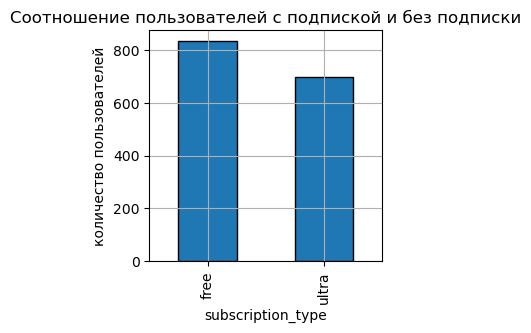

In [40]:
# Выведем диаграмму распределения пользователей по типу подписки
data_users['subscription_type'].value_counts().plot(kind='bar', y='count', grid=True, ec='black', figsize=(3, 3))
plt.title('Соотношение пользователей с подпиской и без подписки')
# plt.xlabel('тип подписки')
plt.ylabel('количество пользователей');

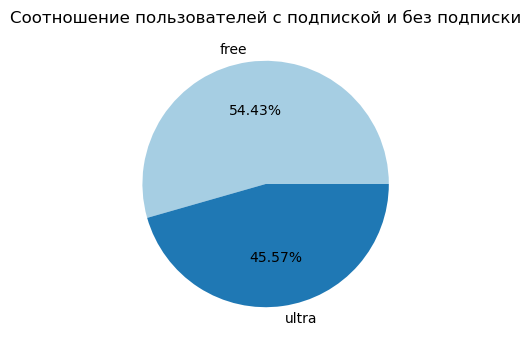

In [41]:
# Построим круговую диаграмму
data_users['subscription_type'].value_counts().plot(kind='pie', y='count', autopct='%1.2f%%', figsize=(6, 4), colors=plt.cm.Paired.colors)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('');

In [42]:
# Посмотрим на распределения значений
print(data_users['subscription_type'].value_counts())

subscription_type
free     835
ultra    699
Name: count, dtype: int64


**Вывод**<br>
Количество пользователей с платной подпиской и без примерно одинаково. Пользователи больше предпочитают пользоваться бесплатной подпиской - 835 пользователей (54.43%), против - 699 пользователей (45.57%).

### 4.3 Возраст пользователей.
<a id="4_3"></a>

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


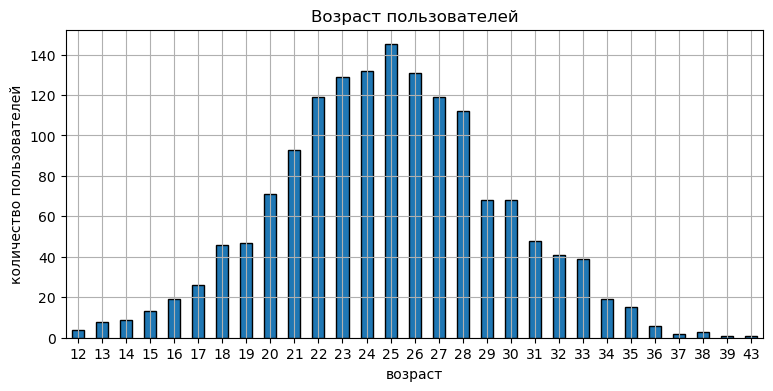

In [43]:
# Посмотрим описательные статистики
print(data_users['age'].describe())
# Выведем график распределения пользователей по возрасту
data_users['age'].value_counts().sort_index().plot(kind='bar', y='count', grid=True, ec='black', figsize=(9, 4))
plt.title('Возраст пользователей')
plt.xlabel('возраст')
plt.ylabel('количество пользователей')
plt.xticks(rotation = 0);

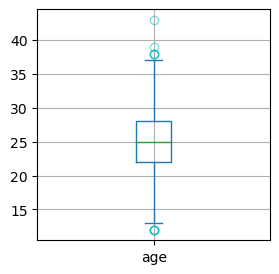

In [44]:
# Просмотр выбросов на boxplot
data_users['age'].plot.box(figsize=(3,3), grid=True, flierprops=dict(markeredgecolor='c', alpha=0.5));

count    1515.000000
mean       24.937294
std         4.370177
min        14.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        36.000000
Name: age, dtype: float64


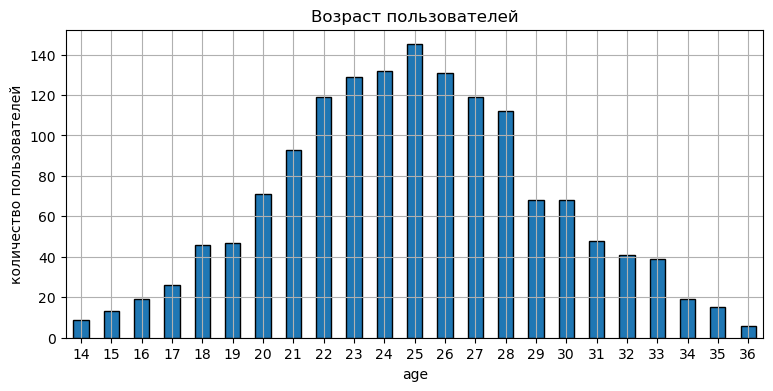

In [45]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
def IQR_limits(data, columns):
    ''' Определяет нижнюю и верхнюю границу выбросов, используя интерквартильных размах (IQR).'''
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

lower, upper = IQR_limits(data_users, 'age')
temp_data = data_users.query('@lower < age < @upper')

# Посмотрим описательные статистики без выбросов
print(temp_data['age'].describe())
# Построим гистограмму без выбросов
temp_data['age'].value_counts().sort_index().plot(kind='bar', y='count', grid=True, ec='black', figsize=(9, 4))
plt.title('Возраст пользователей')
# plt.xlabel('возраст')
plt.ylabel('количество пользователей')
plt.xticks(rotation = 0);

**Вывод**<br>
Рассматриваемый диапазон пользователей 12-43 года. Большая часть пользователей в возрасте 20-30 лет. Самый распространенный вариант - 25 лет. Пользователи младше 20 лет и старше 30 лет встречаются реже. Среднее значение 25 лет и медиана 25 лет.<br>
Поездки на самокатах в основном предпочитают молодые люди.

### 4.4 Расстояние, которое пользователь преодолел за одну поездку.
<a id="4_4"></a>

count    18068.000000
mean      3070.159841
std       1116.831548
min          0.000000
25%       2542.750000
50%       3133.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64


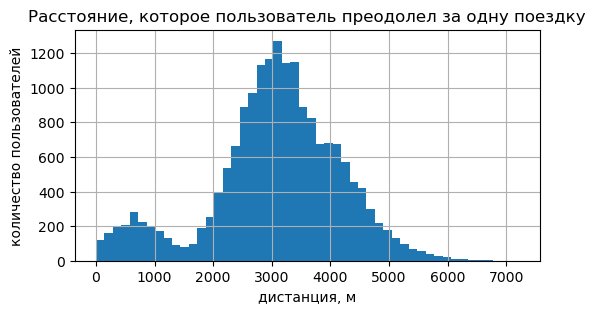

In [46]:
# Посмотрим описательные статистики
print(data_rides['distance'].describe())
# Выведем диаграмму распределения пользователей по дистанции поездки
data_rides['distance'].plot(kind='hist', bins = 50, figsize=(6, 3), grid=True)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('дистанция, м')
plt.ylabel('количество пользователей');

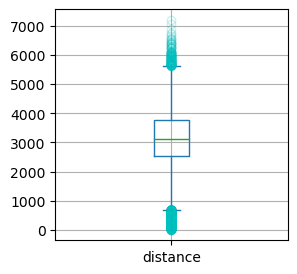

In [47]:
# Просмотр выбросов на boxplot
data_rides['distance'].plot.box(figsize=(3,3), grid=True, flierprops=dict(markeredgecolor='c', alpha=0.2));

count    17033.000000
mean      3191.181941
std        929.044146
min        693.000000
25%       2643.000000
50%       3173.000000
75%       3806.000000
max       5623.000000
Name: distance, dtype: float64


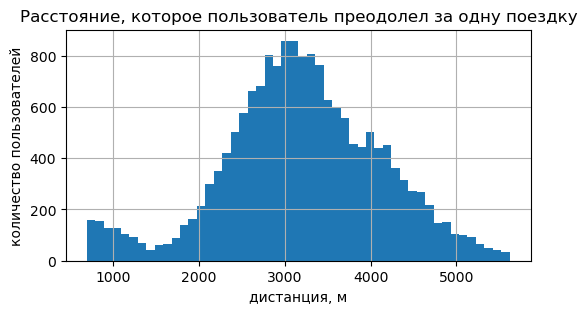

In [48]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits(data_rides, 'distance')
temp_data = data_rides.query('@lower < distance < @upper')

# Посмотрим описательные статистики без выбросов
print(temp_data['distance'].describe())
# Построим гистограмму без выбросов
temp_data['distance'].plot(kind='hist', bins = 50, figsize=(6, 3), grid=True)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('дистанция, м')
plt.ylabel('количество пользователей');

**Вывод**<br>
Большая часть пользователей проезжает за одну поездку около 2-4.5 км. Самый распространенный вариант - около 3 км. Поезки менее 2км встречаются реже, но при этом на диаграмме поездки до 1.5км встречаются часто. Среднее значение 3.17км отклонено в сторону меньших значений. Медиана 3.19км.<br>
Данные показывают, что оптимальное расстояние для поездки на самокате около 3 км, например, чтобы доехать до работы. Но так же люди предпочитают самокат и для малых расстояний до 1.5км, например, чтобы доехать до автобусной остановки.

### 4.5 Продолжительность поездок.
<a id="4_5"></a>

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


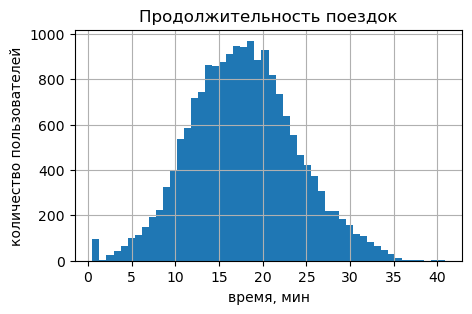

In [49]:
# Посмотрим описательные статистики
print(data_rides['duration'].describe())
# Выведем диаграмму распределения пользователей по времени поездки
data_rides['duration'].plot(kind='hist', bins = 50, figsize=(5, 3), grid=True)
plt.title('Продолжительность поездок')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей');

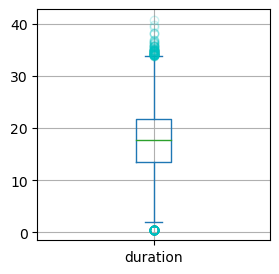

In [50]:
# Просмотр выбросов на boxplot
data_rides['duration'].plot.box(figsize=(3,3), grid=True, flierprops=dict(markeredgecolor='c', alpha=0.2));

count    17891.000000
mean        17.817303
std          5.872508
min          2.035632
25%         13.652768
50%         17.687012
75%         21.684059
max         33.914859
Name: duration, dtype: float64


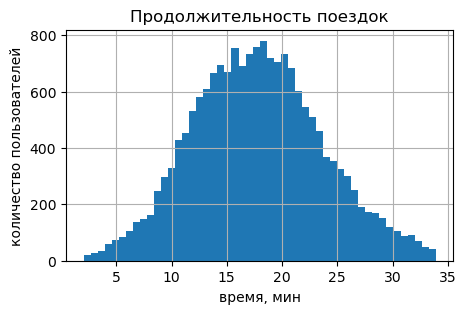

In [51]:
# Пользуясь IQR определяем нижнюю и верхнюю границу значений
lower, upper = IQR_limits(data_rides, 'duration')
temp_data = data_rides.query('@lower < duration < @upper')

# Посмотрим описательные статистики без выбросов
print(temp_data['duration'].describe())
# Построим гистограмму без выбросов
temp_data['duration'].plot(kind='hist', bins = 50, figsize=(5, 3), grid=True)
plt.title('Продолжительность поездок')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей');

**Вывод**<br>
Большая часть пользователей совершает одну поездку за 10-25 мин. Самый распространенный вариант - 17 мин. Поездки менее 10 мин и более 25 мин встречаются реже. Среднее значение 17.8 мин и медиана 17.7 мин.<br>

## 5. Объединение данных.
<a id="5"></a>
5.1. Объединим данные о пользователях, поездках и подписках в один датафрейм.<br>
5.2. Создадим ещё два датафрейма из датафрейма, созданного на этапе 5.1:<br>
-c данными о пользователях без подписки;<br>
-с данными о пользователях с подпиской.<br>
5.3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.<br>

In [52]:
# Объединим данные о пользователях, поездках и подписках в один датафрейм
data = (data_rides
        .merge(data_users, left_on='user_id', right_on='user_id')
        .merge(data_subscriptions, left_on='subscription_type', right_on='subscription_type'))
print('количество строк до объединения:', data_rides.shape[0])
print('количество строк после объединения:', data.shape[0])
data.head()

количество строк до объединения: 18068
количество строк после объединения: 18068


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [53]:
# Создадим ещё два датафрейма: c данными о пользователях с подпиской и без
data_ultra = data[data['subscription_type'] == 'ultra']
data_free = data[data['subscription_type'] == 'free']

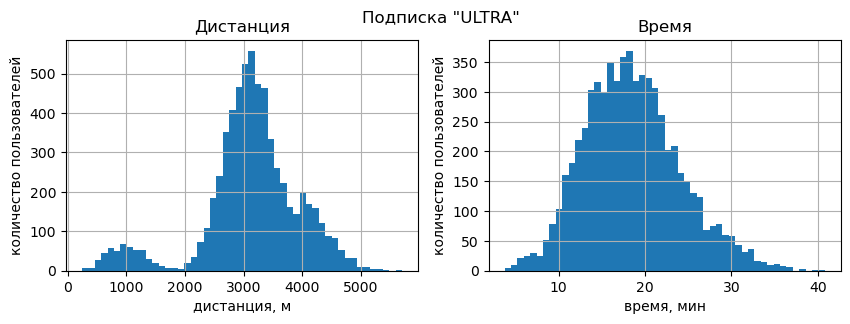

In [54]:
plt.figure(figsize=(10,3))
plt.suptitle('Подписка "ULTRA"')
plt.subplot(1, 2, 1)
# Выведем диаграмму распределения пользователей по дистанции поездки
data_ultra['distance'].plot(kind='hist', bins = 50, grid=True)
plt.title('Дистанция')
plt.xlabel('дистанция, м')
plt.ylabel('количество пользователей')
plt.subplot(1, 2, 2)
# Выведем диаграмму распределения пользователей по времени поездки
data_ultra['duration'].plot(kind='hist', bins = 50, grid=True)
plt.title('Время')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей');

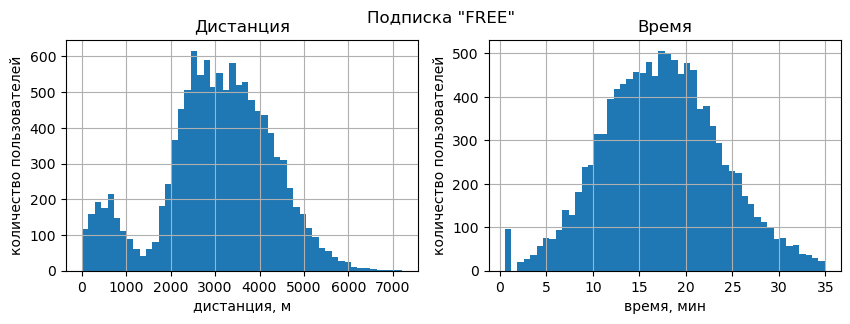

In [55]:
plt.figure(figsize=(10,3))
plt.suptitle('Подписка "FREE"')
plt.subplot(1, 2, 1)
# Выведем диаграмму распределения пользователей по дистанции поездки
data_free['distance'].plot(kind='hist', bins = 50, grid=True)
plt.title('Дистанция')
plt.xlabel('дистанция, м')
plt.ylabel('количество пользователей')
plt.subplot(1, 2, 2)
# Выведем диаграмму распределения пользователей по времени поездки
data_free['duration'].plot(kind='hist', bins = 50, grid=True)
plt.title('Время')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей');

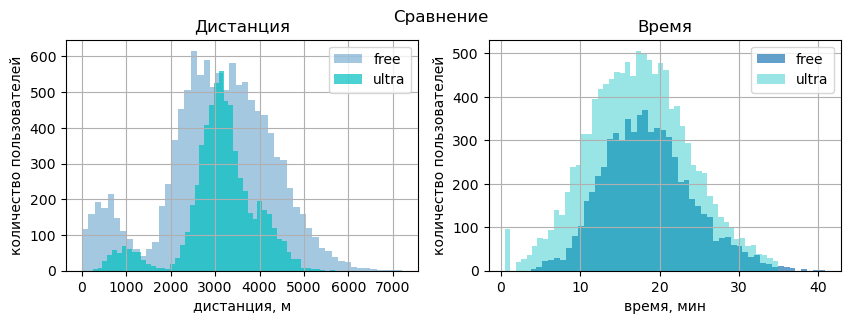

In [56]:
plt.figure(figsize=(10,3))
plt.suptitle('Сравнение')
plt.subplot(1, 2, 1)
# Выведем диаграмму распределения пользователей по дистанции поездки
data_free['distance'].plot(kind='hist', bins = 50, grid=True, alpha=0.4, label='free')
data_ultra['distance'].plot(kind='hist', bins = 50, grid=True, alpha=0.7, label='ultra', color='c')
plt.title('Дистанция')
plt.xlabel('дистанция, м')
plt.ylabel('количество пользователей')
plt.legend()
plt.subplot(1, 2, 2)
# Выведем диаграмму распределения пользователей по времени поездки
data_ultra['duration'].plot(kind='hist', bins = 50, grid=True, alpha=0.7, label='free')
data_free['duration'].plot(kind='hist', bins = 50, grid=True, alpha=0.4, label='ultra', color='c')
plt.title('Время')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.legend();

### Вывод
<a id="5_1"></a>
Объединили данные о пользователях, поездках и подписках в один датафрейм - `data`.

Создали два датафрейма на основе `data`:
- `data_free` - данные о пользователях без подписки
- `data_ultra` - данные о пользователях с подпиской

Визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий:
- Пользователи без подписки имеют больший разброс значений для дистанции и времени поездки, скорее всего потому что пользователи без подписки могут совершать свои поездки спонтанно, в один раз - быстро доехать по делам, а в другой - долго покататься по парку.
- Пользователи с платной подпиской имеют меньший разброс значений, так как скорее всего приобретали подписку для экономии денег при ежедневном или регулярном использовании самоката, скорее всего это однобразные поезки на работу или учебу.

## 6. Подсчёт выручки.
<a id="6"></a>

Создадим датафрейм с агрегированными данными о поездках: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [57]:
data['duration'] = np.ceil(data['duration'])
total_data = pd.pivot_table(data,
                            index=['month', 'user_id'],
                            values=['distance', 'duration', 'subscription_type'],
                            aggfunc={'distance':['count', 'sum'], 'duration':'sum', 'subscription_type':'first'})
total_data.columns = ['count_rides', 'sum_distance', 'sum_duration', 'subscription_type']
# total_data

Посчитаем помесячную выручку по формуле:<br>
стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [58]:
def income(row):
    '''
    Функция считающая выручку по формуле:
    стоимость старта поездки × количество поездок +
    + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах +
    + стоимость подписки.
    '''
    try:
        return (row['start_ride_price'] * row['count_rides']
                + row['minute_price'] * row['sum_duration']
                + row['subscription_fee'])
    except:
        pass

# Добавим информация о стоимости тарифов
total_data = total_data.merge(data_subscriptions, left_on='subscription_type', right_on='subscription_type')
total_data['income'] = total_data.apply(income, axis=1)

In [59]:
total_data

,count_rides,sum_distance,sum_duration,subscription_type,minute_price,start_ride_price,subscription_fee,income
0,2,7026,42.0,ultra,6,0,199,451.0
1,1,3061,13.0,ultra,6,0,199,277.0
2,1,3914,13.0,ultra,6,0,199,277.0
3,2,6477,28.0,ultra,6,0,199,367.0
4,1,3577,33.0,ultra,6,0,199,397.0
...,...,...,...,...,...,...,...,...
11326,1,4597,34.0,free,8,50,0,322.0
11327,1,3644,23.0,free,8,50,0,234.0
11328,1,3998,11.0,free,8,50,0,138.0
11329,2,6111,42.0,free,8,50,0,436.0


### Вывод
<a id="6_1"></a>
Создали датафрейм `total_data` с агрегированными данными на основе датафрейма `data` с объединенными данными.

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также рассчитали помесячную выручку, которую принес каждый пользователь.

## 7. Статистический анализ данных.
<a id="7"></a>

### 7.1. Гипотеза: Пользователи с подпиской тратят больше времени на поездки.
<a id="7_1"></a>
Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

$H_0$: Время поездки пользователей с подпиской = время поездки пользователей без подписки.<br>
$H_1$: Время поездки пользователей с подпиской > время поездки пользователей без подписки.

Уровень статистической значимости: $\alpha = 0.05$ (если p-value окажется меньше него, отвергнем гипотезу).

In [60]:
# уровень статистической значимости
alpha = 0.05
# t-тест
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Наблюдения не противоречат гипотезе.')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


In [61]:
print('Время поездки пользователей с подпиской', data_ultra['duration'].mean().round(2), 'мин')
print('Время поездки пользователей без подписки', data_free['duration'].mean().round(2), 'мин')

Время поездки пользователей с подпиской 18.54 мин
Время поездки пользователей без подписки 17.39 мин


**Вывод**<br>
Полученное значение *p-value = $1.280 \cdot 10^{-34}$* меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени на поездки.

### 7.2. Гипотеза: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку.
<a id="7_2"></a>
Проверим гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

$H_0$: Расстояние, которое проезжают пользователи с подпиской за одну поездку = 3130 метров.<br>
$H_1$: Расстояние, которое проезжают пользователи с подпиской за одну поездку > 3130 метров.

Уровень статистической значимости: $\alpha = 0.05$ (если p-value окажется меньше него, отвергнем гипотезу).

In [62]:
# уровень статистической значимости
alpha = 0.05
# t-тест
results = st.ttest_1samp(data_ultra['distance'], 3130, alternative = 'greater')

print(f'p-значение: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.')
else:
    print('Наблюдения не противоречат гипотезе.')

p-значение: 0.9264356652998772
Наблюдения не противоречат гипотезе.


**Вывод**<br>
Полученное значение *p-value = $0.926$* , больше заданного уровня значимости, поэтому нельзя отвергнуть нулевую гипотезу. Нет оснований говорить, что пользователи с подпиской проезжают менее 3130 метров.

### 7.3. Гипотеза: Выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
<a id="7_3"></a>
Проверим гипотезу: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

$H_0$: Выручка от пользователей с подпиской = выручка от пользователей без подписки.<br>
$H_1$: Выручка от пользователей с подпиской > выручка от пользователей без подписки.

Уровень статистической значимости: $\alpha = 0.05$ (если p-value окажется меньше него, отвергнем гипотезу).

In [63]:
# уровень статистической значимости
alpha = 0.05
# t-тест
sample_ultra = total_data[total_data['subscription_type'] == 'ultra']['income']
sample_free = total_data[total_data['subscription_type'] == 'free']['income']
results = st.ttest_ind(sample_ultra, sample_free, alternative = 'greater')

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Наблюдения не противоречат гипотезе.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.


In [64]:
print('Средняя выручка от пользователей с подпиской', sample_ultra.mean().round(2), 'руб.')
print('Средняя выручка от пользователей без подписки', sample_free.mean().round(2), 'руб.')

Средняя выручка от пользователей с подпиской 362.79 руб.
Средняя выручка от пользователей без подписки 328.64 руб.


**Вывод**<br>
Полученное значение *p-value = $3.914 \cdot 10^{-34}$* меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской приносят больше выручки, чем пользователи без подписки.

### 7.4. Внимание вопрос.
<a id="7_4"></a>
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**
Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых выборок в Python, применяется метод `scipy.stats.ttest_rel()`.

## 8. Распределения.
<a id="8"></a>

### 8.1. Промокоды.
<a id="8_1"></a>

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

При n = 1165, вероятность не выполнить план = 4.60%


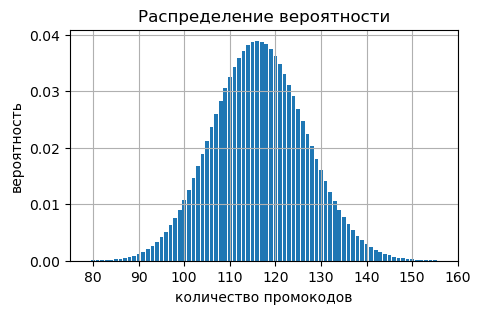

In [65]:
# задаём параметры биномиального распределения
# вероятность успеха (продление подписки)
p = 0.1
# нужно получить k успехов (план минимум 100 клиентов)
k = 100
# количество испытаний (количество промокодов)
n = 1000
# вероятность получить меньше k (вероятность не выполнить план)
prob = 0.05

# найдем минимальное n, вероятность не выполнить план была меньше 5%
while (result := st.binom.cdf(k - 1, n, p)) > prob:
    n += 5
print(f'При n = {n}, вероятность не выполнить план = {result:.2%}')

# построим распределение
distr = [st.binom.pmf(x, n, p) for x in range(0, n + 1)]
# построим график
plt.figure(figsize=(5,3))
plt.bar(range(0, n + 1), distr)
plt.title('Распределение вероятности')
plt.xlabel('количество промокодов')
plt.ylabel('вероятность')
plt.xlim(75, 160)
plt.grid();

**Вывод**<br>
В рамках акции нужно разослать 1165 промокодов, чтобы вероятность не выполнить план была примерно 5 %.

### 8.2. Push-уведомления.
<a id="8_2"></a>

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

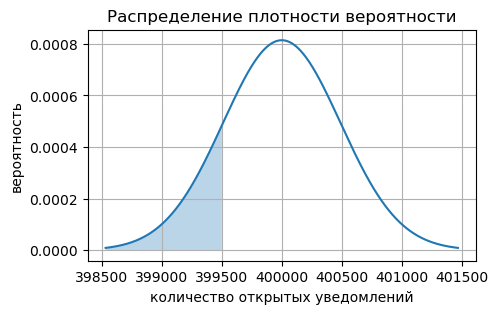

In [66]:
# задаём параметры биномиального распределения
# вероятность успеха (уведомление открыто)
p = 0.4
# нужно получить k успехов (количество пользователей, которые открыют уведомление)
k = 399500
# количество испытаний (количество уведомлений)
n = 1000000

# зададим параметры нормального распределения равными мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# зададим последовательность точек на оси x
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
# задаём нормальное распределение
distr = st.norm.pdf(x, mu, sigma)

# построим функцию плотности
plt.figure(figsize=(5,3))
plt.plot(x, distr);
# и заполним пространство под кривой вплоть до точки x = 399,5 тыс.
px = np.linspace(mu - 3 * sigma, k, 1000)
plt.fill_between(px, st.norm.pdf(px, mu, sigma), alpha = 0.3)
plt.title('Распределение плотности вероятности')
plt.xlabel('количество открытых уведомлений')
plt.ylabel('вероятность')
plt.grid();

In [67]:
# оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей
result = st.norm.cdf(k, mu, sigma)
print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {result:.2%}')

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


**Вывод**<br>
Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15.37%.

## 9. Общий вывод
<a id="9"></a>
**Проведено исследование сервиса аренды самокатов, в ходе исследования выполнено:**

**1.** Была получена первичная информация по 3 датасетам: с пользователями, информацией о поездках, информацией о подписках. (см. [2. Первичный анализ данных -> Вывод](#2_4)).

**2.** Обнаружены неверные типы данных, дубликаты и аномалии в датасете. Изменены типы данных. Аномалии и дубликаты обработаны. (см.[3. Предобработка данных -> Вывод](#3_4)).

**3.** **Проведен исследовательский анализ данных:**
- Количество пользователей по городам распределено равномерно. Наибольшее количество в Пятигорске - 219 пользователей. Меньше всего пользователей в Москве - 168.
- Пользователи больше предпочитают пользоваться бесплатной подпиской - 835 пользователей (54.43%), против - 699 пользователей (45.57%). Но при этом количество пользователей с платной подпиской и без примерно одинаково.
- Большая часть пользователей в возрасте 20-30 лет. Самый распространенный вариант - 25 лет.
- Большая часть пользователей проезжает за одну поездку около 2-4 км. Самый распространенный вариант - около 3 км. При этом поездки до 1.5км тоже встречаются часто.
- Большая часть пользователей совершает одну поездку за 10-25 мин.

**4.** Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма для пользователей с подпиской и без. (см. [5. Объединение данных -> Вывод](#5_1))

**5.** Рассчитана помесячная выручка, которую принес каждый пользователь. (см. [6. Подсчёт выручки -> Вывод](#6_1))

**6.** **Проведено ститистическое исследование:**
- Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени на поездки.
- Нет оснований говорить, что пользователи с подпиской проезжают менее 3130 метров.
- Есть основания говорить, что пользователи с подпиской приносят больше выручки, чем пользователи без подписки.

**7.** Решены дополнительные задачи от отдела маркетинга:
- В рамках акции нужно разослать 1165 промокодов, чтобы вероятность не выполнить план в 100 продлений была примерно 5 %.
- Вероятность того, что после рассылки 1 млн. уведомлений, уведомление откроют не более 399,5 тыс. пользователей равна 15.37%.